In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime

## Adatok

Amint beszéltük, a napi és heti adatokat vettem havonta és azok átlaga lett a havi "értéke". Ezután kiválasztottam egy 20 éves periódust, ami 2000-11-01-től 2020-11-01-ig tart. Az adatokat összegyüjtöttem egy dataframe-be (data elnevezéssel). Volt egy pár elég erősen korrelált változom, azokat kivettem a dataframe-ből (data1 elnevezéssel). Újra szemügyre véve a korrelációs mátrixot még mindig volt olyan változó ami erősen korrelált volt, ezt kivéve kaptam meg a végleges adathalmazomat (data2 elnevezéssel).

Hossein, A., Ai Jun, H., and Farrukh, J., 2013, "The importance of the macroeconomic variables in forecasting stock return variance a GARCH-MIDAS approach" cikkben használt változókat és az általam gyüjtött változókat használtam fel. Az lenne a kérdés, hogy mennyi értelme lenne annak, hogy PCA-val képezzünk meg főkomponenseket? Egy próbálkozást tettem ennek a notebooknak az alján erre.

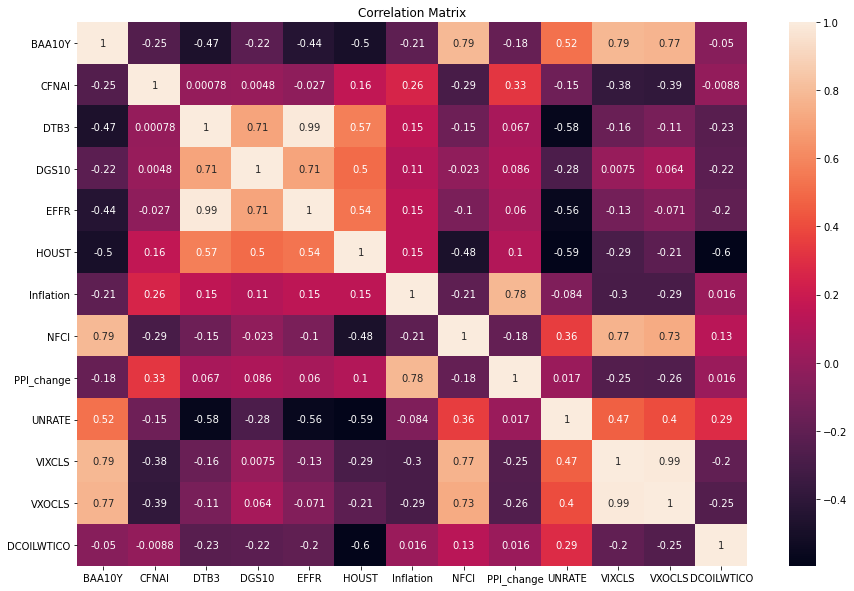

In [2]:
baa = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/BAA10Y_monthly.csv')
baa.iloc[:, 0] = baa.iloc[:, 0].astype('datetime64[ms]')
baa.set_index(baa.iloc[:, 0], drop = True, inplace = True)
baa = baa.iloc[:, 1]
baa = baa[(baa.index >= datetime(2000, 11, 1)) & (baa.index <= datetime(2020, 11, 1))]

dtb = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/DTB3_monthly.csv')
dtb.iloc[:, 0] = dtb.iloc[:, 0].astype('datetime64[ms]')
dtb.set_index(dtb.iloc[:, 0], drop = True, inplace = True)
dtb = dtb.iloc[:, 1]
dtb = dtb[(dtb.index >= datetime(2000, 11, 1)) & (dtb.index <= datetime(2020, 11, 1))]

dsg = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/DGS10_monthly.csv')
dsg.iloc[:, 0] = dsg.iloc[:, 0].astype('datetime64[ms]')
dsg.set_index(dsg.iloc[:, 0], drop = True, inplace = True)
dsg = dsg.iloc[:, 1]
dsg = dsg[(dsg.index >= datetime(2000, 11, 1)) & (dsg.index <= datetime(2020, 11, 1))]

wti = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/DCOILWTICO_monthly.csv')
wti.iloc[:, 0] = wti.iloc[:, 0].astype('datetime64[ms]')
wti.set_index(wti.iloc[:, 0], drop = True, inplace = True)
wti = wti.iloc[:, 1]
wti = wti[(wti.index >= datetime(2000, 11, 1)) & (wti.index <= datetime(2020, 11, 1))]

eff = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/EFFR_monthly.csv')
eff.iloc[:, 0] = eff.iloc[:, 0].astype('datetime64[ms]')
eff.set_index(eff.iloc[:, 0], drop = True, inplace = True)
eff = eff.iloc[:, 1]
eff = eff[(eff.index >= datetime(2000, 11, 1)) & (eff.index <= datetime(2020, 11, 1))]

nfc = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/NFCI_monthly.csv')
nfc.iloc[:, 0] = nfc.iloc[:, 0].astype('datetime64[ms]')
nfc.set_index(nfc.iloc[:, 0], drop = True, inplace = True)
nfc = nfc.iloc[:, 1]
nfc = nfc[(nfc.index >= datetime(2000, 11, 1)) & (nfc.index <= datetime(2020, 11, 1))]

vix = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/VIXCLS_monthly.csv')
vix.iloc[:, 0] = vix.iloc[:, 0].astype('datetime64[ms]')
vix.set_index(vix.iloc[:, 0], drop = True, inplace = True)
vix = vix.iloc[:, 1]
vix = vix[(vix.index >= datetime(2000, 11, 1)) & (vix.index <= datetime(2020, 11, 1))]

vxo = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/VXOCLS_monthly.csv')
vxo.iloc[:, 0] = vxo.iloc[:, 0].astype('datetime64[ms]')
vxo.set_index(vxo.iloc[:, 0], drop = True, inplace = True)
vxo = vxo.iloc[:, 1]
vxo = vxo[(vxo.index >= datetime(2000, 11, 1)) & (vxo.index <= datetime(2020, 11, 1))]

cfnai = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CFNAI.csv')
cfnai.DATE = pd.to_datetime(cfnai.DATE)
cfnai = cfnai.set_index(cfnai.DATE)
cfnai = cfnai.iloc[:, 1]
cfnai = cfnai[(cfnai.index >= datetime(2000, 11, 1)) & (cfnai.index <= datetime(2020, 11, 1))]

cpi = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CPIAUCSL.csv')
cpi['Inflation'] = (cpi.CPIAUCSL / cpi.CPIAUCSL.shift(1) - 1) * 100
cpi.DATE = pd.to_datetime(cpi.DATE)
cpi = cpi.set_index(cpi.DATE)
inf = cpi.iloc[:, 2]
inf = inf[(inf.index >= datetime(2000, 11, 1)) & (inf.index <= datetime(2020, 11, 1))]

houst = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/HOUST.csv')
houst.HOUST = (houst.HOUST - np.min(houst.HOUST))/(np.max(houst.HOUST) - np.min(houst.HOUST))
#houst.HOUST = (houst.HOUST / houst.HOUST.shift(1) - 1) * 100
houst.DATE = pd.to_datetime(houst.DATE)
houst = houst.set_index(houst.DATE)
houst = houst.iloc[:, 1]
houst = houst[(houst.index >= datetime(2000, 11, 1)) & (houst.index <= datetime(2020, 11, 1))]

ppi = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/PPIACO.csv')
ppi['PPI_change'] = (ppi.PPIACO / ppi.PPIACO.shift(1) - 1) * 100
ppi.DATE = pd.to_datetime(ppi.DATE)
ppi = ppi.set_index(ppi.DATE)
ppi = ppi.iloc[:, 2]
ppi = ppi[(ppi.index >= datetime(2000, 11, 1)) & (ppi.index <= datetime(2020, 11, 1))]

unrate = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/UNRATE.csv')
unrate.DATE = pd.to_datetime(unrate.DATE)
unrate = unrate.set_index(unrate.DATE)
unrate = unrate.iloc[:, 1]
unrate = unrate[(unrate.index >= datetime(2000, 11, 1)) & (unrate.index <= datetime(2020, 11, 1))]

data = pd.concat([baa, cfnai, dtb, dsg, eff, houst, inf, nfc, ppi, unrate, vix, vxo, wti], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(data.corr(), annot = True)
ax.set_title('Correlation Matrix')
plt.show()

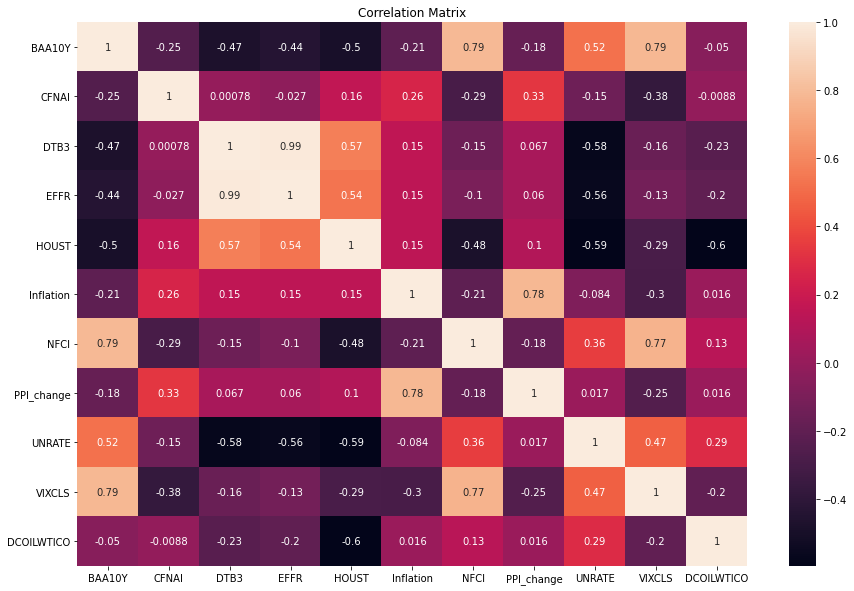

In [3]:
data1 = pd.concat([baa, cfnai, dtb, eff, houst, inf, nfc, ppi, unrate, vix, wti], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(data1.corr(), annot = True)
ax.set_title('Correlation Matrix')
plt.show()

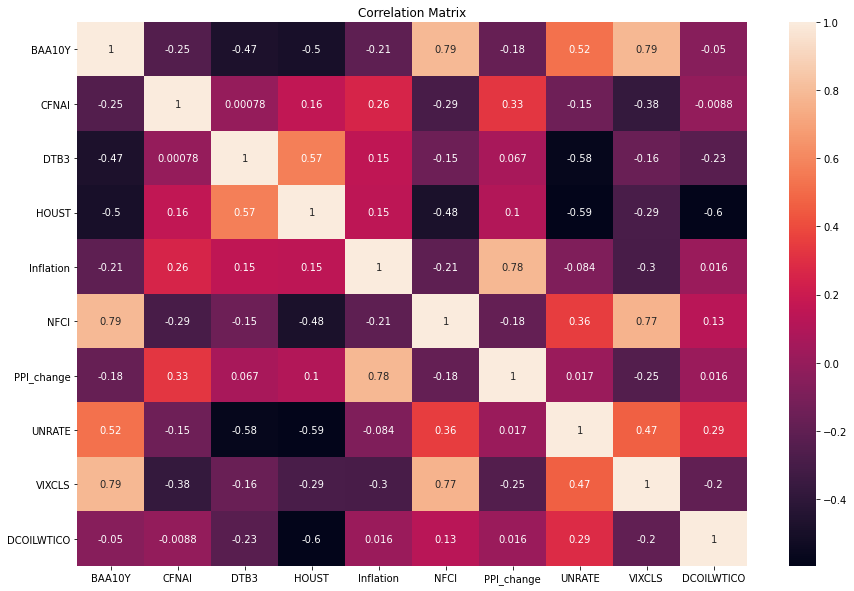

In [4]:
data2 = pd.concat([baa, cfnai, dtb, houst, inf, nfc, ppi, unrate, vix, wti], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(data2.corr(), annot = True)
ax.set_title('Correlation Matrix')
plt.show()

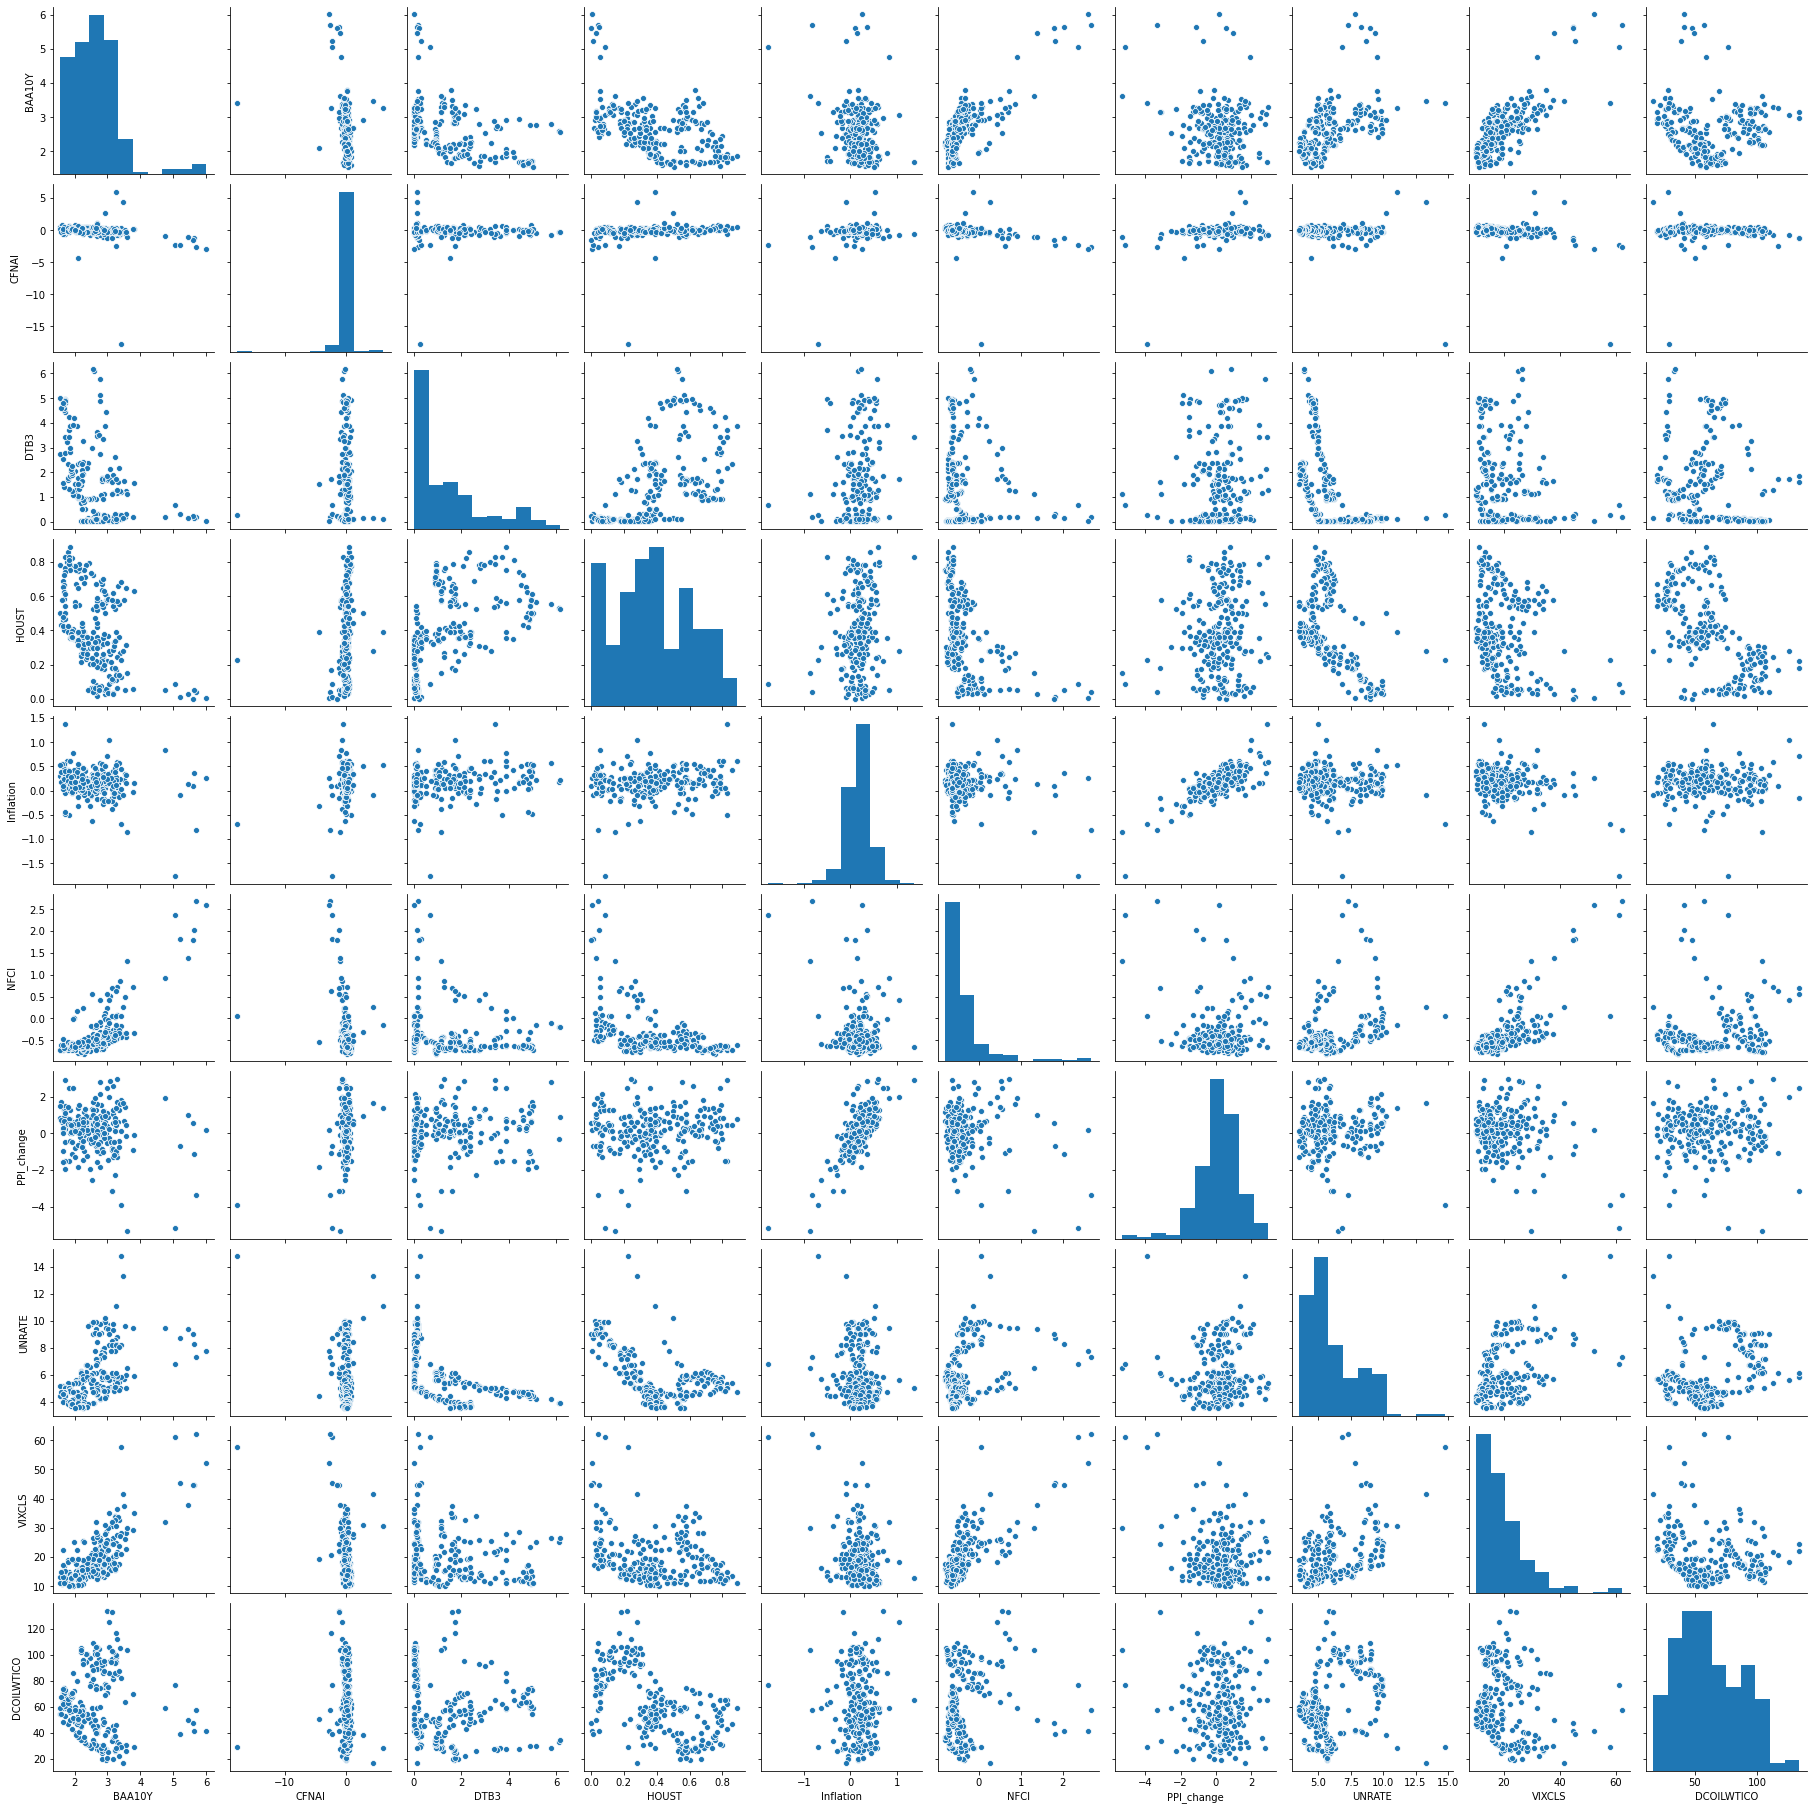

In [5]:
sns.pairplot(data2)
plt.show()

In [6]:
data2.describe()

,BAA10Y,CFNAI,DTB3,HOUST,Inflation,NFCI,PPI_change,UNRATE,VIXCLS,DCOILWTICO
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,2.637810,-0.159046,1.425978,0.386637,0.168942,-0.348602,0.165321,6.067635,19.806529,61.981393
std,0.750613,1.381864,1.591207,0.230574,0.295561,0.550071,1.188930,1.982893,8.690204,25.880241
min,1.553000,-17.730000,0.011429,0.000000,-1.770548,-0.803402,-5.332656,3.500000,10.125455,16.547619
25%,2.124545,-0.310000,0.104286,0.217758,0.041416,-0.637933,-0.401606,4.700000,13.853913,41.710000
50%,2.624286,-0.040000,0.936957,0.360615,0.186419,-0.515176,0.229183,5.500000,17.342500,58.893182
75%,2.989048,0.180000,2.126316,0.568948,0.317125,-0.328058,0.831734,7.300000,23.612857,82.303333
max,6.008696,5.960000,6.171905,0.890377,1.376849,2.674955,2.985856,14.800000,62.253500,133.880000


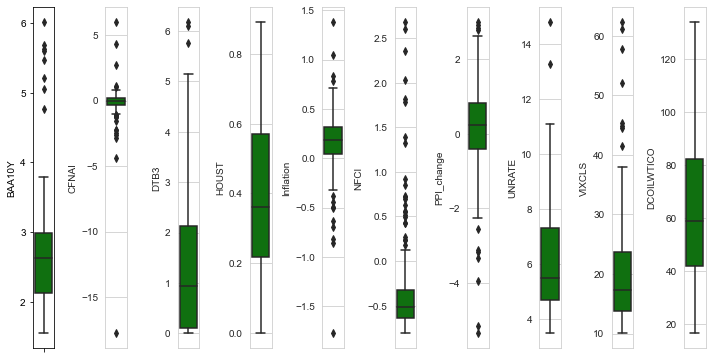

In [7]:
l = data2.columns.values
number_of_columns=10
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data2[l[i]],color='green',orient='v')
    plt.tight_layout()

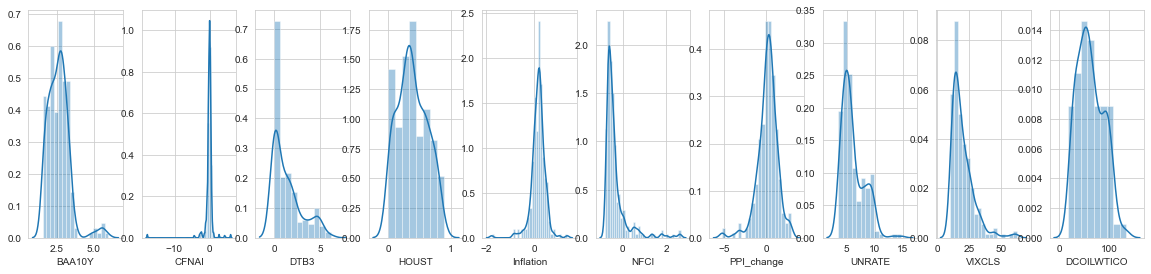

In [8]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data2[l[i]],kde=True)

## Principal Component Analysis:

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data2)
print('The amount of variance explained by each of the selected components: ',pca.explained_variance_ratio_)
print('The total amount of variance explained is {}%'.format(np.round(np.sum(pca.explained_variance_ratio_), 4)))

The amount of variance explained by each of the selected components:  [0.89074339 0.09860835]
The total amount of variance explained is 0.9894%


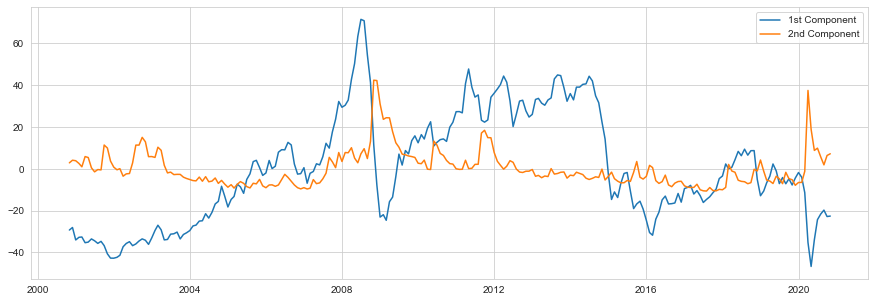

In [21]:
explanatory_vars = pca.transform(data2)

plt.figure(figsize=(15, 5))
plt.plot(data2.index, explanatory_vars.T[0], label = '1st Component')
plt.plot(data2.index, explanatory_vars.T[1], label = '2nd Component')
plt.legend(loc = 'best')
plt.show()

In [28]:
pd.DataFrame(pca.components_, columns = data2.columns, index = ['1', '2']).T

,1,2
BAA10Y,-0.001961,0.069507
CFNAI,0.000016,-0.062810
DTB3,-0.013852,-0.044012
HOUST,-0.005227,-0.011592
Inflation,0.000259,-0.010362
NFCI,0.002323,0.051381
PPI_change,0.001030,-0.035159
UNRATE,0.021161,0.129394
VIXCLS,-0.073148,0.981688
DCOILWTICO,0.996981,0.068665
